In [1]:
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset("titanic")
titanic.to_csv('data/titanic.csv', index=False)

In [2]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [3]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [4]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [5]:
titanic['deck'] = titanic['deck'].fillna('C')
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

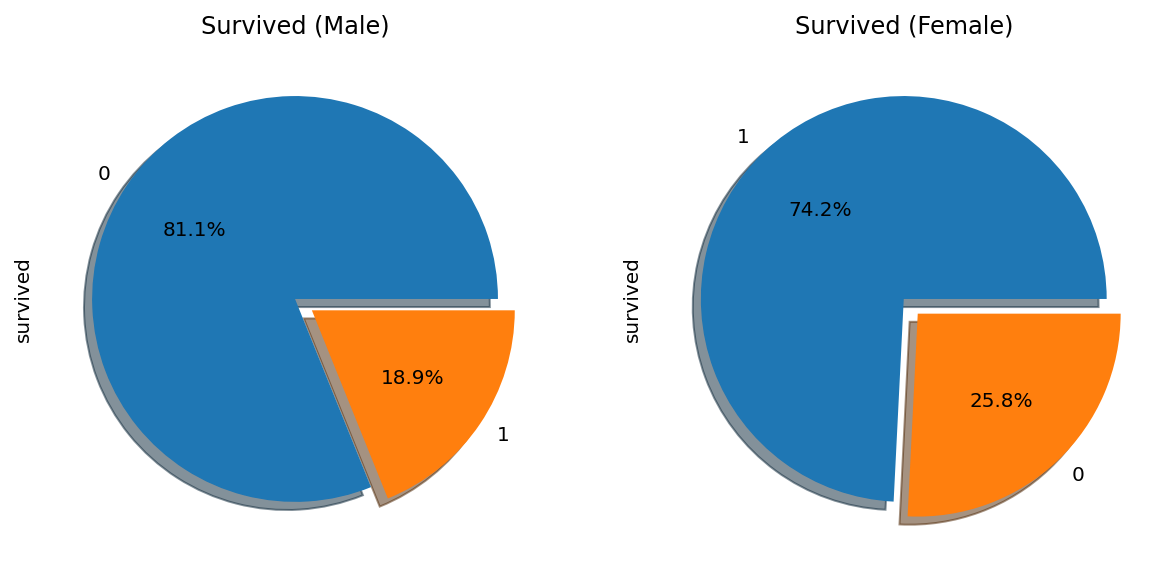

In [30]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 2, figsize = (10, 5))
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[1], shadow = True)

ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


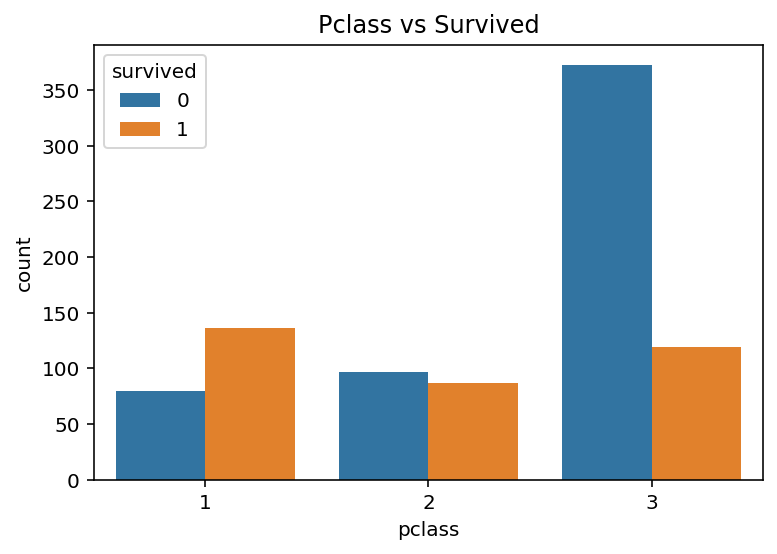

In [31]:
sns.countplot('pclass', hue='survived', data=titanic)
plt.title('Pclass vs Survived')
plt.show()

In [32]:
titanic_corr = titanic.corr(method = 'pearson')
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [33]:
titanic_corr.to_csv('data/titanic_corr.csv', index=False)

In [34]:
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053258

In [35]:
titanic['survived'].corr(titanic['fare'])

0.25730652238496227

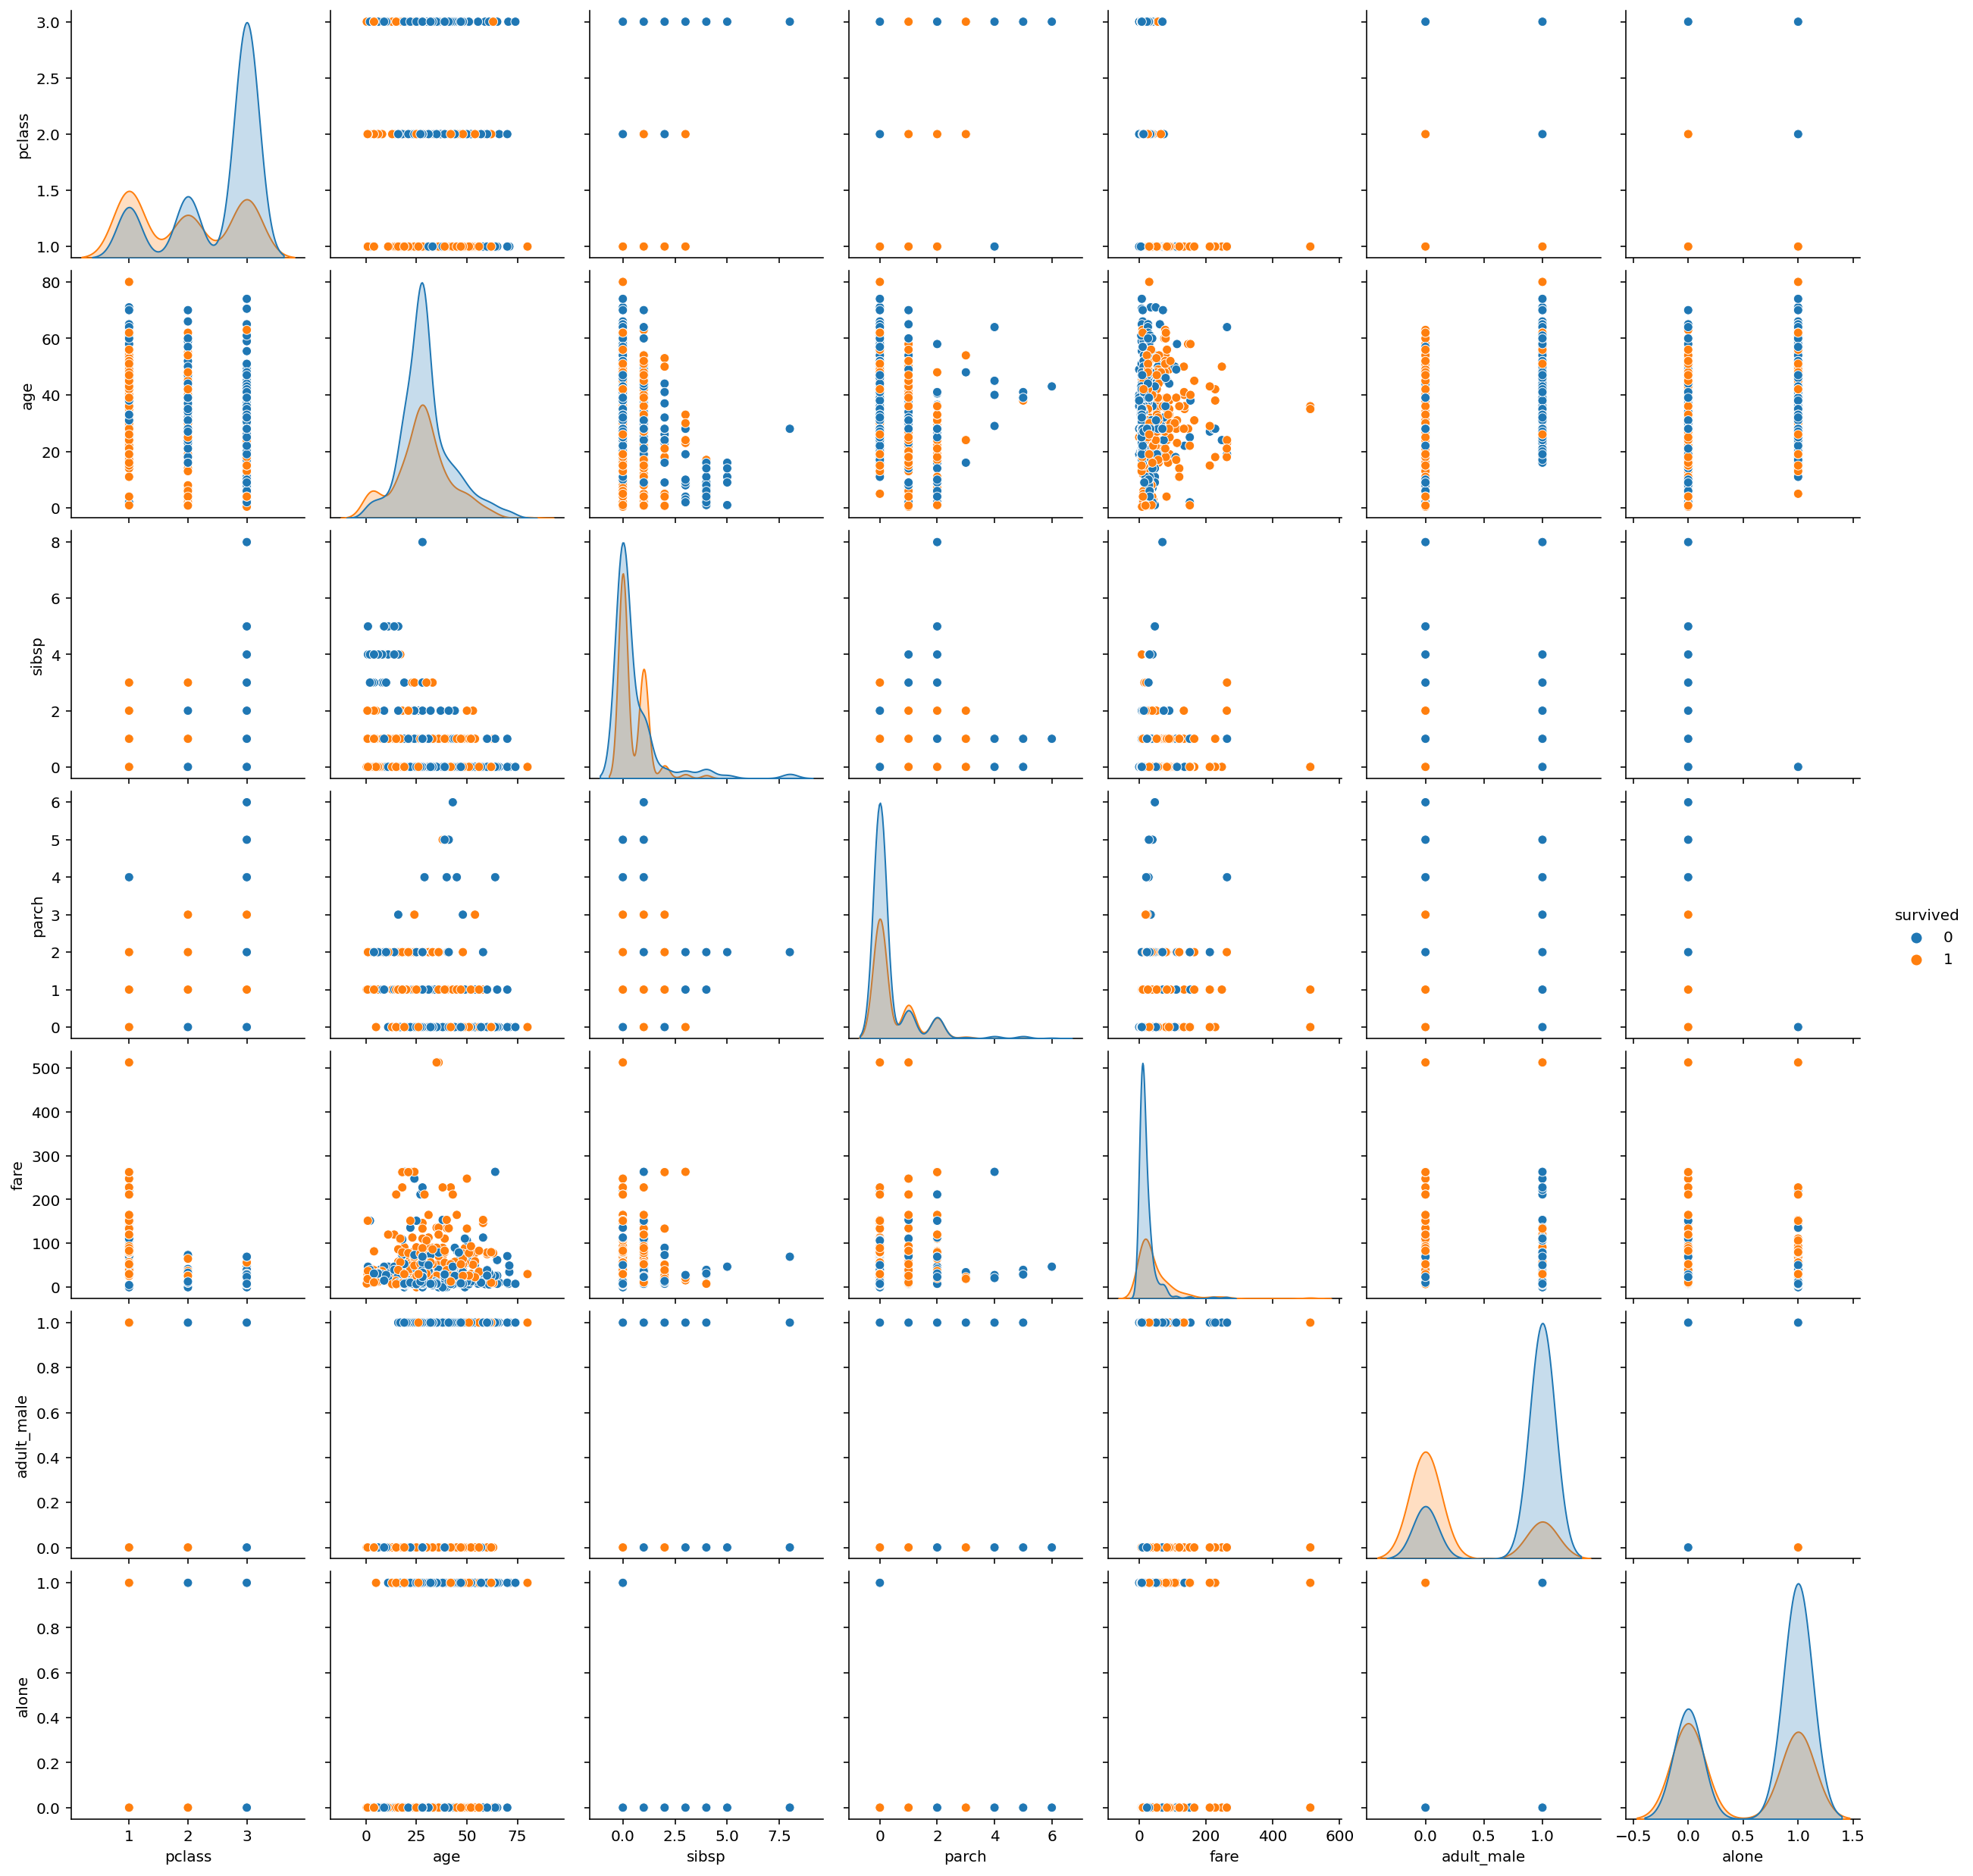

In [36]:
sns.pairplot(titanic, hue='survived')
plt.show()

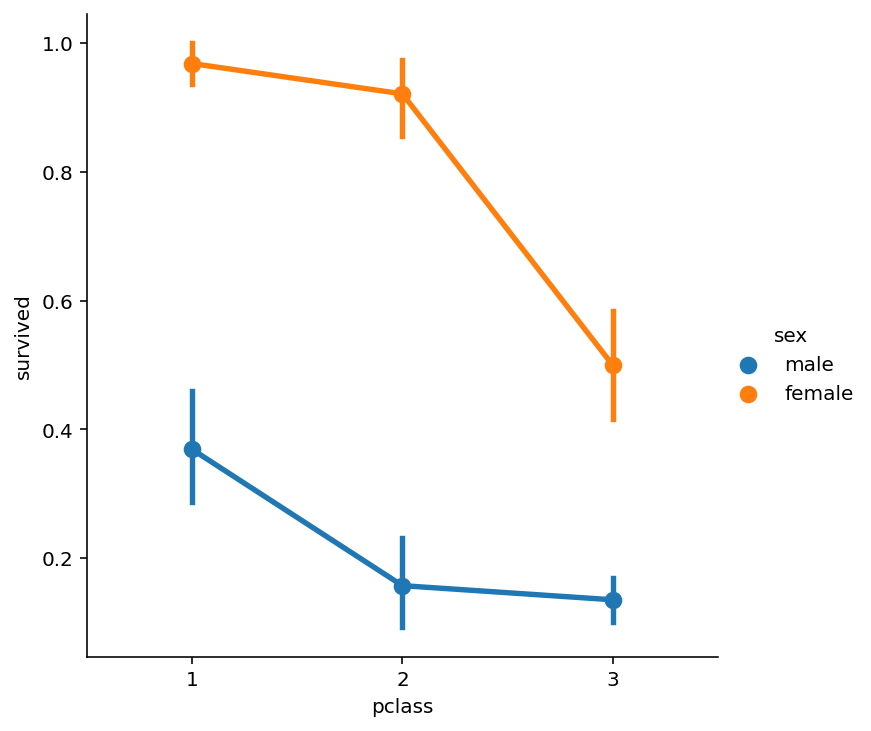

In [38]:
sns.catplot(x = 'pclass', y = 'survived', hue='sex', data=titanic, kind='point')
plt.show()

In [39]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [52]:
titanic['age2'] = titanic['age'].apply(category_age)
genders = {"male":1, "female":0}
titanic['sex'] = titanic['sex'].map(genders)
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1

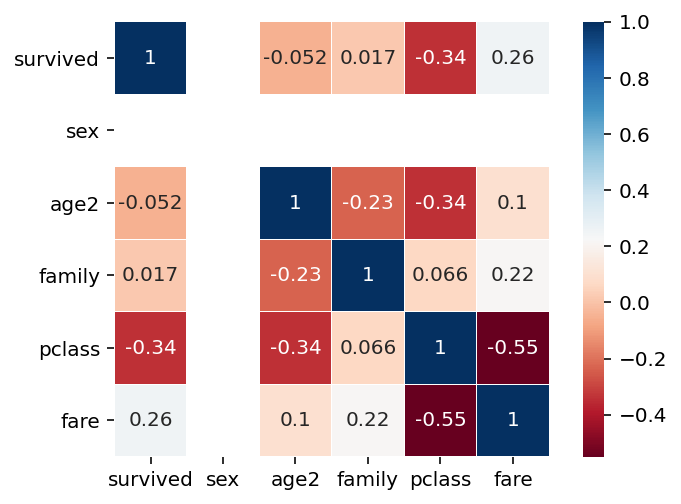

In [53]:
titanic.to_csv('data/titanic3.csv', index=False)
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]
colormap = plt.cm.RdBu
sns.heatmap(heatmap_data.astype(float).corr(),
            linewidths = 0.1,
            vmax=1.0,
            square = True,
            cmap = colormap,
            linecolor = 'white',
            annot = True,
            annot_kws = {"size":10})
plt.show()